In [50]:
import os
os.environ["OMP_NUM_THREADS"]='8'
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp
import timeit
import pysindy as ps
from scipy.special import erf
import multiprocessing
from IPython.display import Video,display

loadstr='module load cuda && '
def kuramoto(t, theta, omegas, sigma, adj):
    c=np.cos(theta)
    s=np.sin(theta)
    return omegas + sigma * (s*adj.dot(c)-c*adj.dot(s))

## Dynamics for individual simulations

In [10]:
N=10000
K=10000
seed=1
c=1.75
t1=100
dt=1E-2
print('Store whole adjacency matrix with single precision')
os.system('bash -c "%s ./kuramoto -N %i -K %i -c %f -t %f -d %f -s %i -nv data/test"'%(loadstr,N,K,c,t1,dt,seed))
print('\nRecalculate adjacency elements each step with single precision')
os.system('bash -c "%s ./kuramoto -N %i -K %i -c %f -t %f -d %f -s %i -nvA data/testA"'%(loadstr,N,K,c,t1,dt,seed))
print('\nStore whole adjacency matrix with double precision')
os.system('bash -c "%s ./kuramoto_64 -N %i -K %i -c %f -t %f -d %f -s %i -nv data/test64"'%(loadstr,N,K,c,t1,dt,seed))

Store whole adjacency matrix with single precision
GPU Memory: 25006309376 25192824832 1204000000
Using random initial conditions
Using random frequencies
Using random adjacency matrix
1.000	2.619e+01	-8.267e-03	0.119949	846	
runtime: 26.206418

Recalculate adjacency elements each step with single precision
GPU Memory: 25006309376 25192824832 4000000
Using random initial conditions
Using random frequencies
Using random adjacency matrix
1.000	9.382e+01	-2.112e-02	0.121503	846	
runtime: 93.887063

Store whole adjacency matrix with double precision
GPU Memory: 25006309376 25192824832 2408000000
Using random initial conditions
Using random frequencies
Using random adjacency matrix
1.001	6.051e+01	-6.278e-02	0.120100	845	
runtime: 60.521239


0

./kuramoto -N 10000 -K 10000 -c 1.750000 -t 100.000000 -d 0.010000 -s 1 -nv data/test 

runtime: 26.206418



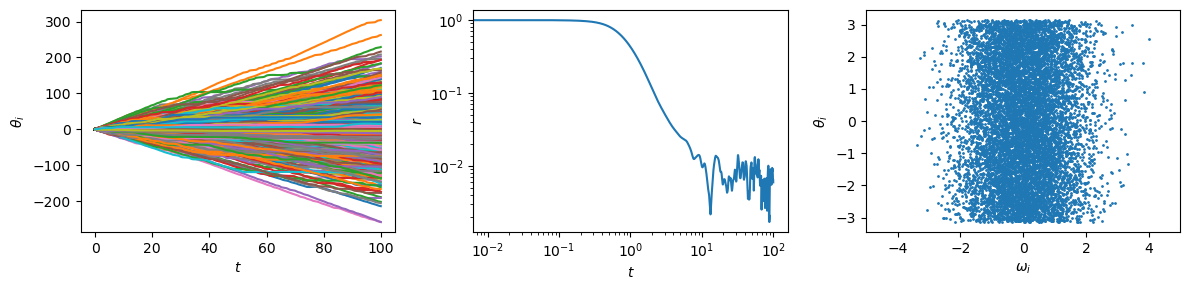

In [11]:
filebase='data/test'
file=open(filebase+'.out')
lines=file.readlines()
N,K,t1,dt,c,seed=np.array(lines[0].split(),dtype=np.float64)
N=int(N)
K=int(K)
print(lines[1])
print(lines[-1])
file.close()

omega=np.fromfile(filebase+'frequencies.dat',dtype=np.float32)
N=len(omega)
thetas=np.unwrap(np.fromfile(filebase+'thetas.dat',dtype=np.float32).reshape((-1,N)),axis=0)
r=np.fromfile(filebase+'order.dat',dtype=np.float32)

plt.subplots(1,3,figsize=(12,3))
plt.subplot(1,3,1)
plt.plot(dt*np.arange(len(thetas)),thetas)
plt.xlabel('$t$')
plt.ylabel(r'$\theta_i$')

plt.subplot(1,3,2)
plt.plot(dt*np.arange(len(r)),r)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$t$')
plt.ylabel('$r$')

plt.subplot(1,3,3)
theta=np.fromfile(filebase+'fs.dat',dtype=np.float32)[:N]
order=np.argsort(omega)
plt.scatter(omega,np.mod(theta+np.pi,2*np.pi)-np.pi,s=1)
plt.xlim(np.median(omega)-5,np.median(omega)+5)
plt.xlabel('$\omega_i$')
plt.ylabel(r'$\theta_i$')

plt.tight_layout()
plt.show()

./kuramoto -N 10000 -K 10000 -c 1.750000 -t 100.000000 -d 0.010000 -s 1 -nvA data/testA 

runtime: 93.887063



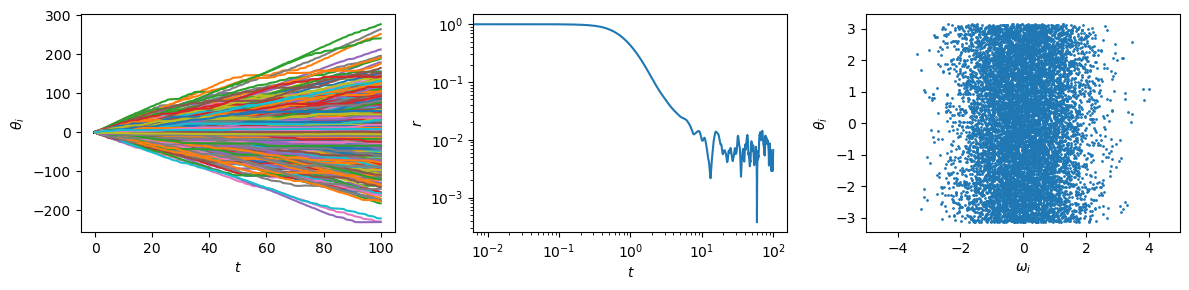

In [12]:
filebase='data/testA'
file=open(filebase+'.out')
lines=file.readlines()
N,K,t1,dt,c,seed=np.array(lines[0].split(),dtype=np.float64)
N=int(N)
K=int(K)
print(lines[1])
print(lines[-1])
file.close()

omega=np.fromfile(filebase+'frequencies.dat',dtype=np.float32)
N=len(omega)
thetas=np.fromfile(filebase+'thetas.dat',dtype=np.float32).reshape((-1,N))
r=np.fromfile(filebase+'order.dat',dtype=np.float32)

plt.subplots(1,3,figsize=(12,3))
plt.subplot(1,3,1)
plt.plot(dt*np.arange(len(thetas)),thetas)
plt.xlabel('$t$')
plt.ylabel(r'$\theta_i$')

plt.subplot(1,3,2)
plt.plot(dt*np.arange(len(r)),r)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$t$')
plt.ylabel('$r$')

plt.subplot(1,3,3)
theta=np.fromfile(filebase+'fs.dat',dtype=np.float32)[:N]
order=np.argsort(omega)
plt.scatter(omega,np.mod(theta+np.pi,2*np.pi)-np.pi,s=1)
plt.xlim(np.median(omega)-5,np.median(omega)+5)
plt.xlabel('$\omega_i$')
plt.ylabel(r'$\theta_i$')

plt.tight_layout()
plt.show()

./kuramoto_64 -N 10000 -K 10000 -c 1.750000 -t 100.000000 -d 0.010000 -s 1 -nv data/test64 

runtime: 60.521239



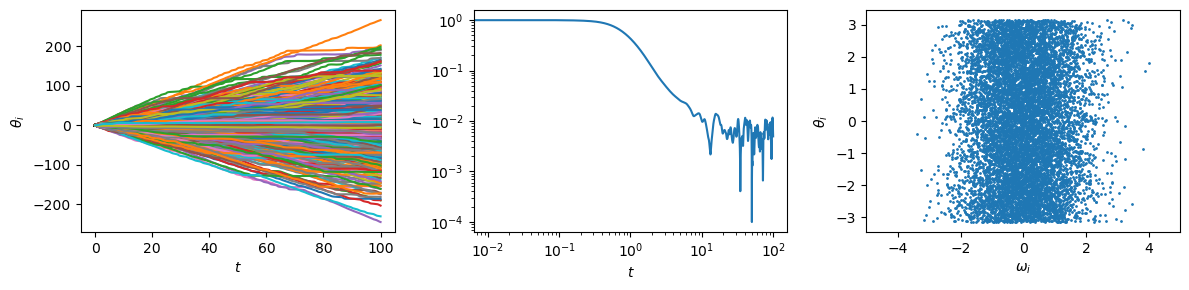

In [13]:
filebase='data/test64'
file=open(filebase+'.out')
lines=file.readlines()
N,K,t1,dt,c,seed=np.array(lines[0].split(),dtype=np.float64)
N=int(N)
K=int(K)
print(lines[1])
print(lines[-1])
file.close()

omega=np.fromfile(filebase+'frequencies.dat',dtype=np.float64)
N=len(omega)
thetas=np.fromfile(filebase+'thetas.dat',dtype=np.float64).reshape((-1,N))
r=np.fromfile(filebase+'order.dat',dtype=np.float64)

plt.subplots(1,3,figsize=(12,3))
plt.subplot(1,3,1)
plt.plot(dt*np.arange(len(thetas)),thetas)
plt.xlabel('$t$')
plt.ylabel(r'$\theta_i$')

plt.subplot(1,3,2)
plt.plot(dt*np.arange(len(r)),r)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$t$')
plt.ylabel('$r$')

plt.subplot(1,3,3)
theta=np.fromfile(filebase+'fs.dat',dtype=np.float64)[:N]
order=np.argsort(omega)
plt.scatter(omega,np.mod(theta+np.pi,2*np.pi)-np.pi,s=1)
plt.xlim(np.median(omega)-5,np.median(omega)+5)
plt.xlabel('$\omega_i$')
plt.ylabel(r'$\theta_i$')

plt.tight_layout()
plt.show()

### Animate a simulation

In [87]:
N=100000
K=100000
seed=1
c=3
t1=20
dt=2E-2

os.system('bash -c "%s ./kuramoto -N %i -K %i -c %f -t %f -d %f -s %i -D1 -nvA data/testbig"'%(loadstr,N,K,c,t1,dt,seed))

GPU Memory: 25006309376 25192824832 40000000
Using random initial conditions
Using random frequencies
Using random adjacency matrix
1.000	4.218e+02	-5.229e-02	0.095955	230	
runtime: 422.154478


0

./kuramoto -N 100000 -K 100000 -c 3.000000 -t 20.000000 -d 0.020000 -s 1 -D1 -nvA data/testbig 

runtime: 422.154478

1001


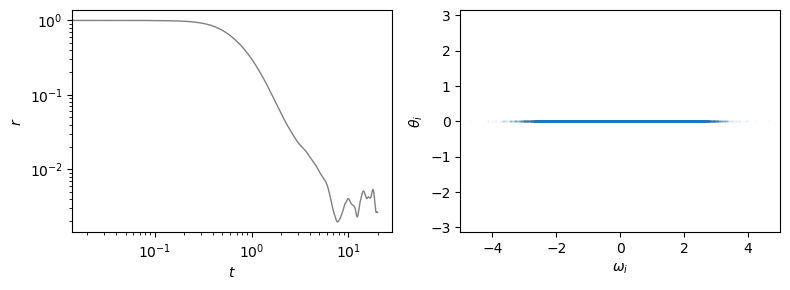

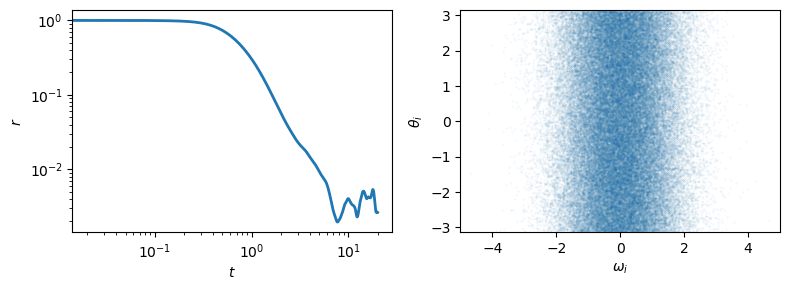

In [88]:
filebase='data/testbig'
file=open(filebase+'.out')
lines=file.readlines()
N,K,t1,dt,c,seed=np.array(lines[0].split(),dtype=np.float64)
N=int(N)
K=int(K)
print(lines[1])
print(lines[-1])
file.close()

omega=np.fromfile(filebase+'frequencies.dat',dtype=np.float32)
N=len(omega)
thetas=np.fromfile(filebase+'thetas.dat',dtype=np.float32).reshape((-1,N))
r=np.fromfile(filebase+'order.dat',dtype=np.float32)

def makeplot(n, save=True, show=False):
    plt.subplots(1,2,figsize=(8,3))
    plt.subplot(1,2,1)
    plt.plot(dt*np.arange(len(r)),r,lw=1,c='gray')
    plt.plot(dt*np.arange(n),r[:n],lw=2)
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('$t$')
    plt.ylabel('$r$')

    plt.subplot(1,2,2)
    theta=np.fromfile(filebase+'fs.dat',dtype=np.float32)[:N]
    order=np.argsort(omega)
    plt.scatter(omega,np.mod(thetas[n]+np.pi,2*np.pi)-np.pi,s=0.1,alpha=0.1)
    plt.xlim(np.median(omega)-5,np.median(omega)+5)
    plt.ylim(-np.pi,np.pi)
    plt.xlabel('$\omega_i$')
    plt.ylabel(r'$\theta_i$')

    plt.tight_layout()
    if save:
        plt.savefig(filebase+'animation/%04i.png'%n,dpi=200)
    if show:
        plt.show()
    plt.close()

print(len(thetas))
makeplot(0,show=True,save=False)
makeplot(len(thetas)-1,show=True,save=False)


In [89]:
if not os.path.exists(filebase+'animation'):
    os.mkdir(filebase+'animation')
else:
    os.system('rm %sanimation/*'%(filebase))

nt=len(thetas)
start=timeit.default_timer()
pool = multiprocessing.Pool(8,maxtasksperchild=1)
pool.map(makeplot, range(nt))
pool.close()
stop=timeit.default_timer()
print(stop-start)

os.system('encode.sh %sanimation %sanimation 30'%(filebase, filebase))

display(Video('%sanimation.mp4'%(filebase),width=512))

120.8517638379708


ffmpeg version 4.2.2 Copyright (c) 2000-2019 the FFmpeg developers
  built with gcc 7.3.0 (crosstool-NG 1.23.0.449-a04d0)
  configuration: --prefix=/tmp/build/80754af9/ffmpeg_1587154242452/_h_env_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placeho --cc=/tmp/build/80754af9/ffmpeg_1587154242452/_build_env/bin/x86_64-conda_cos6-linux-gnu-cc --disable-doc --enable-avresample --enable-gmp --enable-hardcoded-tables --enable-libfreetype --enable-libvpx --enable-pthreads --enable-libopus --enable-postproc --enable-pic --enable-pthreads --enable-shared --enable-static --enable-version3 --enable-zlib --enable-libmp3lame --disable-nonfree --enable-gpl --enable-gnutls --disable-openssl --enable-libopenh264 --enable-libx264
  libavutil      56. 31.100 / 56. 31.100
  libavcodec     58. 54.100 / 58. 54.100
  libavformat    58. 29.100 / 58. 29.100


In [90]:
N=100000
K=6
seed=1
c=3
t1=20
dt=2E-2
os.system('bash -c "%s ./kuramoto -N %i -K %i -c %f -t %f -d %f -s %i -D1 -nvA data/testbig2"'%(loadstr,N,K,c,t1,dt,seed))

GPU Memory: 25006309376 25192824832 40000000
Using random initial conditions
Using random frequencies
Using random adjacency matrix
1.008	1.353e+01	-1.085e-01	0.164475	120	
runtime: 13.551172


0

./kuramoto -N 100000 -K 6 -c 3.000000 -t 20.000000 -d 0.020000 -s 1 -D1 -nvA data/testbig2 

runtime: 13.551172

1001


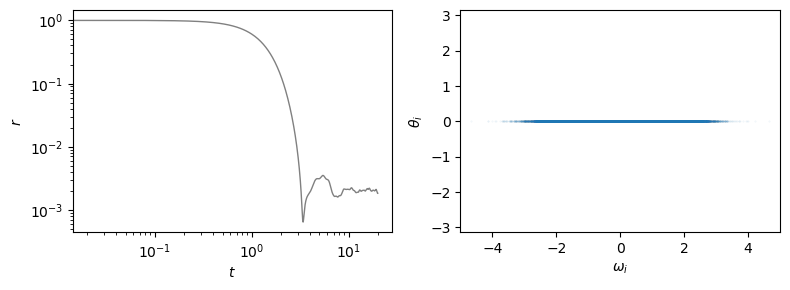

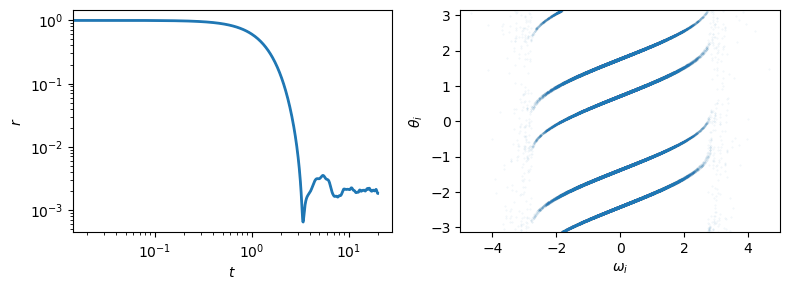

In [91]:
filebase='data/testbig2'
file=open(filebase+'.out')
lines=file.readlines()
N,K,t1,dt,c,seed=np.array(lines[0].split(),dtype=np.float64)
N=int(N)
K=int(K)
print(lines[1])
print(lines[-1])
file.close()

omega=np.fromfile(filebase+'frequencies.dat',dtype=np.float32)
N=len(omega)
thetas=np.fromfile(filebase+'thetas.dat',dtype=np.float32).reshape((-1,N))
r=np.fromfile(filebase+'order.dat',dtype=np.float32)

def makeplot(n, save=True, show=False):
    plt.subplots(1,2,figsize=(8,3))
    plt.subplot(1,2,1)
    plt.plot(dt*np.arange(len(r)),r,lw=1,c='gray')
    plt.plot(dt*np.arange(n),r[:n],lw=2)
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('$t$')
    plt.ylabel('$r$')

    plt.subplot(1,2,2)
    theta=np.fromfile(filebase+'fs.dat',dtype=np.float32)[:N]
    order=np.argsort(omega)
    plt.scatter(omega,np.mod(thetas[n]+np.pi,2*np.pi)-np.pi,s=0.1,alpha=0.1)
    plt.xlim(np.median(omega)-5,np.median(omega)+5)
    plt.ylim(-np.pi,np.pi)
    plt.xlabel('$\omega_i$')
    plt.ylabel(r'$\theta_i$')

    plt.tight_layout()
    if save:
        plt.savefig(filebase+'animation/%04i.png'%n,dpi=200)
    if show:
        plt.show()
    plt.close()

print(len(thetas))
makeplot(0,show=True,save=False)
makeplot(len(thetas)-1,show=True,save=False)


In [92]:
if not os.path.exists(filebase+'animation'):
    os.mkdir(filebase+'animation')
else:
    os.system('rm %sanimation/*'%(filebase))

nt=len(thetas)
start=timeit.default_timer()
pool = multiprocessing.Pool(8,maxtasksperchild=1)
pool.map(makeplot, range(nt))
pool.close()
stop=timeit.default_timer()
print(stop-start)

os.system('encode.sh %sanimation %sanimation 30'%(filebase, filebase))

display(Video('%sanimation.mp4'%(filebase),width=512))

103.31385384593159


ffmpeg version 4.2.2 Copyright (c) 2000-2019 the FFmpeg developers
  built with gcc 7.3.0 (crosstool-NG 1.23.0.449-a04d0)
  configuration: --prefix=/tmp/build/80754af9/ffmpeg_1587154242452/_h_env_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placeho --cc=/tmp/build/80754af9/ffmpeg_1587154242452/_build_env/bin/x86_64-conda_cos6-linux-gnu-cc --disable-doc --enable-avresample --enable-gmp --enable-hardcoded-tables --enable-libfreetype --enable-libvpx --enable-pthreads --enable-libopus --enable-postproc --enable-pic --enable-pthreads --enable-shared --enable-static --enable-version3 --enable-zlib --enable-libmp3lame --disable-nonfree --enable-gpl --enable-gnutls --disable-openssl --enable-libopenh264 --enable-libx264
  libavutil      56. 31.100 / 56. 31.100
  libavcodec     58. 54.100 / 58. 54.100
  libavformat    58. 29.100 / 58. 29.100


### Order parameter averaged over 750 seeds, as in Ottino and Strogatz

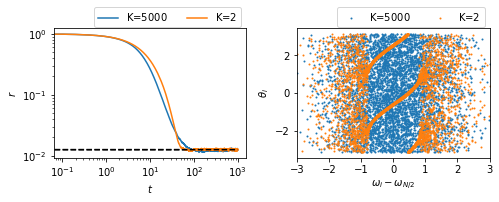

In [13]:
N=5000
Ks=[5000,2]
dt=0.1

plt.subplots(1,2,figsize=(7,3))

for K in Ks:
    plt.subplot(1,2,1)
    r=np.load('data/%i_lorentz/%i/avgorder.npy'%(N,K))
    plt.plot(dt*np.arange(len(r)),r,label='K=$%i$'%K)
    plt.plot(dt*np.arange(len(r)),(np.pi/4)**0.5/(N**0.5)*np.ones(len(r)),ls='--',c='black')
    plt.gca().legend(bbox_to_anchor=(1, 1.2),ncol=2)
    plt.ylabel('$r$')
    plt.xlabel(r'$t$')
    plt.xscale('log')
    plt.yscale('log')

    plt.subplot(1,2,2)
    filebase='data/%i/%i/%i'%(N,K,1)
    omega=np.fromfile(filebase+'frequencies.dat',np.float32)
    theta=np.mod(np.fromfile(filebase+'fs.dat',dtype=np.float32)[:N]+np.pi,2*np.pi)-np.pi
    plt.scatter(omega-np.median(omega),theta,s=1,label='K=$%i$'%K)
    plt.xlabel('$\omega_i$')
    plt.ylabel(r'$\theta_i$')

plt.gca().legend(bbox_to_anchor=(1, 1.2),ncol=2)

plt.xlim(-3,3)
plt.xlabel('$\omega_i-\omega_{N/2}$')
plt.ylabel(r'$\theta_i$')

plt.tight_layout()
plt.savefig('5000lorentz.pdf')
plt.show()

### Order parameter averaged over 750 seeds, for normally distributed frequencies

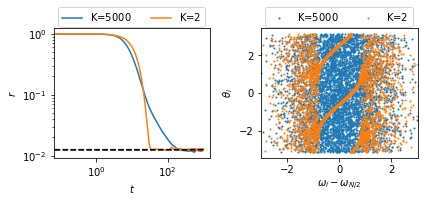

In [14]:
N=5000
Ks=[5000,2]
dt=0.1

plt.subplots(1,2,figsize=(6,3))

for K in Ks:
    plt.subplot(1,2,1)
    r=np.load('data/%i/%i/avgorder.npy'%(N,K))
    plt.plot(dt*np.arange(len(r)),r,label='K=$%i$'%K)
    plt.plot(dt*np.arange(len(r)),(np.pi/4)**0.5/(N**0.5)*np.ones(len(r)),ls='--',c='black')
    plt.gca().legend(bbox_to_anchor=(1, 1.2),ncol=2)
    plt.ylabel('$r$')
    plt.xlabel(r'$t$')
    plt.xscale('log')
    plt.yscale('log')

    plt.subplot(1,2,2)
    filebase='data/%i/%i/%i'%(N,K,1)
    omega=np.fromfile(filebase+'frequencies.dat',np.float32)
    theta=np.mod(np.fromfile(filebase+'fs.dat',np.float32)+np.pi,2*np.pi)[:N]-np.pi
    plt.scatter(omega-np.median(omega),theta,s=1,label='K=$%i$'%K)
    plt.xlabel('$\omega_i$')
    plt.ylabel(r'$\theta_i$')

plt.gca().legend(bbox_to_anchor=(1, 1.2),ncol=2)

plt.xlim(-3,3)
plt.xlabel('$\omega_i-\omega_{N/2}$')
plt.ylabel(r'$\theta_i$')

plt.tight_layout()
plt.savefig('5000normal.pdf')
plt.show()

### Order parameter averaged over 500 seeds, for normally distributed frequencies with much larger N

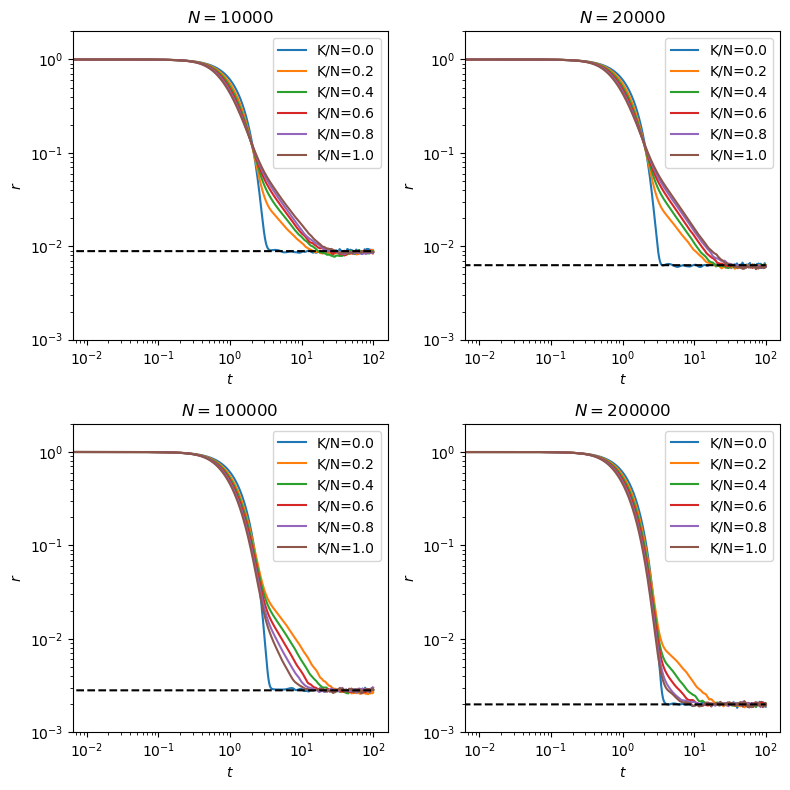

In [14]:
dt=0.01
seed=1
seeds=500
rows=101

Ns=[10000, 20000, 100000, 200000]
fig,ax=plt.subplots(2,2,figsize=(8,8))

ind=1
for N in Ns:
    Ks=[0,2*N//10,4*N//10,6*N//10,8*N//10,N]
        
    plt.subplot(2,2,ind)
    for K in Ks:
        if os.path.exists('data/%i/%i/avgorder.npy'%(N,K)):
            plt.plot(dt*np.arange(10001),np.load('data/%i/%i/avgorder.npy'%(N,K)),label='K/N=%.1f'%(K/N))
            plt.yscale('log')
            plt.xscale('log',base=10,subs=np.arange(10))
            plt.xlabel('$t$')
            plt.ylabel('$r$')
            plt.ylim(1E-3,2E0)

    plt.plot(dt*np.arange(10001),(np.pi/4)**0.5/(N**0.5)*np.ones(10001),ls='--',c='black')
    plt.title('$N=%i$'%N)
    ind=ind+1


    
    plt.legend()

plt.tight_layout()
plt.savefig('orders_2.pdf')
plt.show()

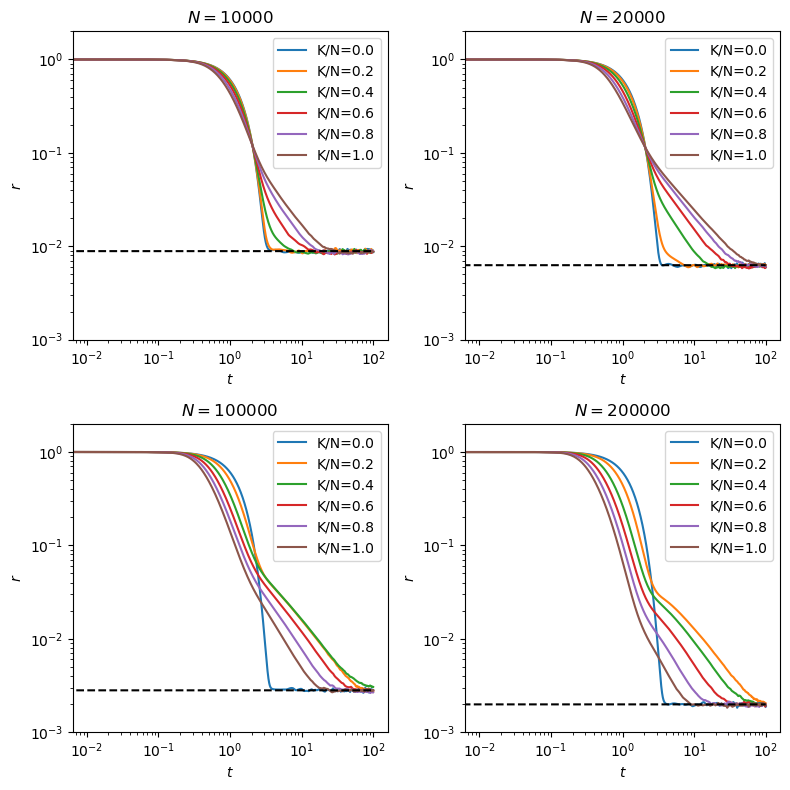

In [12]:
dt=0.01
seed=1
seeds=500
rows=101

Ns=[10000, 20000, 100000, 200000]
fig,ax=plt.subplots(2,2,figsize=(8,8))

ind=1
for N in Ns:
    Ks=[0,2*N//10,4*N//10,6*N//10,8*N//10,N]
        
    plt.subplot(2,2,ind)
    for K in Ks:
        if os.path.exists('data3/%i/%i/avgorder.npy'%(N,K)):
            plt.plot(dt*np.arange(10001),np.load('data3/%i/%i/avgorder.npy'%(N,K)),label='K/N=%.1f'%(K/N))
            plt.yscale('log')
            plt.xscale('log',base=10,subs=np.arange(10))
            plt.xlabel('$t$')
            plt.ylabel('$r$')
            plt.ylim(1E-3,2E0)

    plt.plot(dt*np.arange(10001),(np.pi/4)**0.5/(N**0.5)*np.ones(10001),ls='--',c='black')
    plt.title('$N=%i$'%N)
    ind=ind+1


    
    plt.legend()

plt.tight_layout()
plt.savefig('orders3_2.pdf')
plt.show()

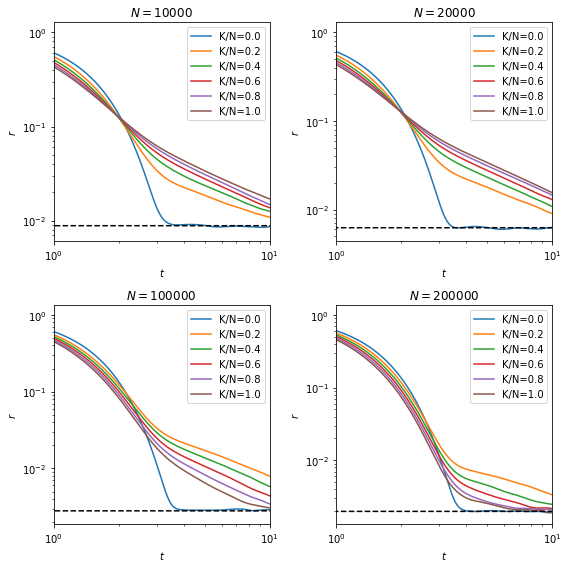

In [16]:
dt=0.01
seed=1
seeds=500
rows=101

Ns=[10000, 20000, 100000, 200000]
fig,ax=plt.subplots(2,2,figsize=(8,8))

ind=1
for N in Ns:
    Ks=[0,2*N//10,4*N//10,6*N//10,8*N//10,N]
        
    plt.subplot(2,2,ind)
    for K in Ks:
        if os.path.exists('data/%i/%i/avgorder.npy'%(N,K)):
            plt.plot(dt*np.arange(10001),np.load('data/%i/%i/avgorder.npy'%(N,K)),label='K/N=%.1f'%(K/N))
            plt.yscale('log')
            plt.xscale('log',base=10,subs=np.arange(10))
            plt.xlabel('$t$')
            plt.ylabel('$r$')
            plt.xlim(1,10)

    plt.plot(dt*np.arange(10001),(np.pi/4)**0.5/(N**0.5)*np.ones(10001),ls='--',c='black')
    plt.title('$N=%i$'%N)
    ind=ind+1


    
    plt.legend()

plt.tight_layout()
plt.savefig('orders2.pdf')

plt.show()

### Benchmark against solve_ivp

runtime: 127.978962


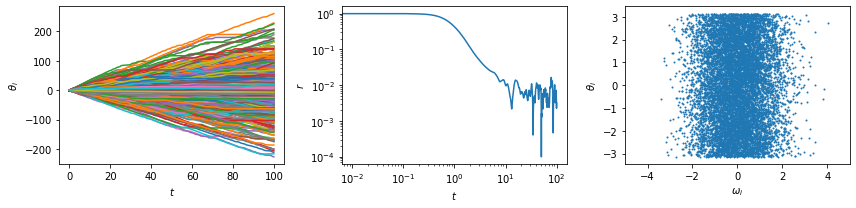

In [18]:
np.random.seed(1)
N=10000
K=10000
omega=np.fromfile('data/test64frequencies.dat')
adj=np.fromfile('data/test64adj.dat').reshape((N,N))

sigma=1.75
t1=100
dt=0.01
dt1=dt/1000

theta=np.zeros(N)

start=timeit.default_timer()
sol=solve_ivp(kuramoto, [0, t1], theta, rtol=0, atol=1E-6, args=(omega, sigma, adj), dense_output=True, method='RK45')
stop=timeit.default_timer()
print("runtime: %f"%(stop-start))

t=dt*np.arange(10001)
thetas=sol.sol(t).T
r=np.abs(np.mean(np.exp(1j*thetas),axis=1))


plt.subplots(1,3,figsize=(12,3))
plt.subplot(1,3,1)
plt.plot(dt*np.arange(len(thetas)),thetas)
plt.xlabel('$t$')
plt.ylabel(r'$\theta_i$')

plt.subplot(1,3,2)
plt.plot(dt*np.arange(len(r)),r)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$t$')
plt.ylabel('$r$')

plt.subplot(1,3,3)
order=np.argsort(omega)
plt.scatter(omega,np.mod(thetas[-1]+np.pi,2*np.pi)-np.pi,s=1)
plt.xlim(np.median(omega)-5,np.median(omega)+5)
plt.xlabel('$\omega_i$')
plt.ylabel(r'$\theta_i$')

plt.tight_layout()
plt.show()

./kuramoto -N 10000 -K 10000 -c 1.750000 -t 100.000000 -d 0.010000 -s 1 -nv data/test 

runtime: 9.624590



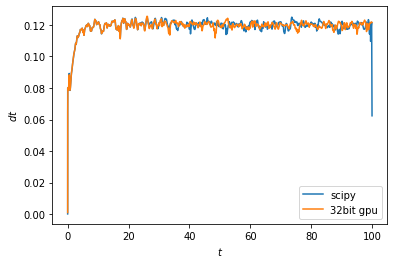

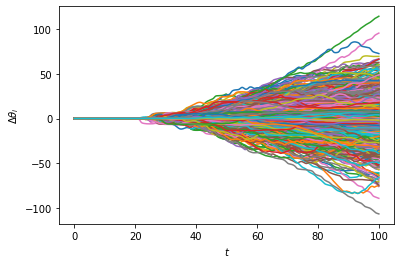

In [19]:
filebase='data/test'
file=open(filebase+'.out')
lines=file.readlines()
N,K,t1,dt,c,seed=np.array(lines[0].split(),dtype=np.float64)
N=int(N)
K=int(K)
print(lines[1])
print(lines[-1])
file.close()

plt.plot(sol.t[:-1],np.diff(sol.t),label='scipy')
plt.plot(np.fromfile(filebase+'times.dat',dtype=np.float32)[:-1],np.diff(np.fromfile(filebase+'times.dat',dtype=np.float32)),label='32bit gpu')
plt.legend()
plt.xlabel('$t$')
plt.ylabel('$dt$')
plt.show()

plt.plot(t,thetas-np.fromfile(filebase+'thetas.dat',dtype=np.float32).reshape((-1,N)))
plt.xlabel('$t$')
plt.ylabel(r'$\Delta\theta_i$')
plt.show()

./kuramoto -N 10000 -K 10000 -c 1.750000 -t 100.000000 -d 0.010000 -s 1 -nvA data/testA 

runtime: 28.431965



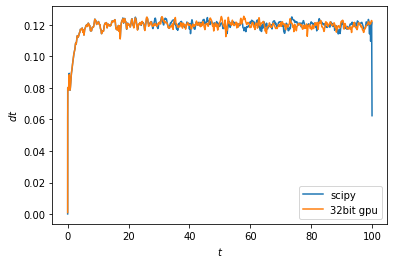

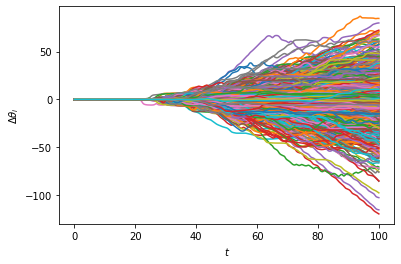

In [20]:
filebase='data/testA'
file=open(filebase+'.out')
lines=file.readlines()
N,K,t1,dt,c,seed=np.array(lines[0].split(),dtype=np.float64)
N=int(N)
K=int(K)
print(lines[1])
print(lines[-1])
file.close()

plt.plot(sol.t[:-1],np.diff(sol.t),label='scipy')
plt.plot(np.fromfile(filebase+'times.dat',dtype=np.float32)[:-1],np.diff(np.fromfile(filebase+'times.dat',dtype=np.float32)),label='32bit gpu')
plt.legend()
plt.xlabel('$t$')
plt.ylabel('$dt$')
plt.show()

plt.plot(t,thetas-np.fromfile(filebase+'thetas.dat',dtype=np.float32).reshape((-1,N)))
plt.xlabel('$t$')
plt.ylabel(r'$\Delta\theta_i$')
plt.show()

./kuramoto_64 -N 10000 -K 10000 -c 1.750000 -t 100.000000 -d 0.010000 -s 1 -nv data/test64 

runtime: 25.083427



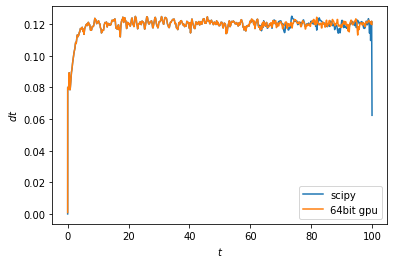

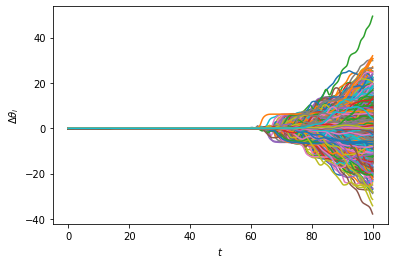

In [21]:
filebase='data/test64'
file=open(filebase+'.out')
lines=file.readlines()
N,K,t1,dt,c,seed=np.array(lines[0].split(),dtype=np.float64)
N=int(N)
K=int(K)
print(lines[1])
print(lines[-1])
file.close()

plt.plot(sol.t[:-1],np.diff(sol.t),label='scipy')
plt.plot(np.fromfile(filebase+'times.dat',dtype=np.float64)[:-1],np.diff(np.fromfile(filebase+'times.dat',dtype=np.float64)),label='64bit gpu')
plt.legend()
plt.xlabel('$t$')
plt.ylabel('$dt$')
plt.show()

plt.plot(t,thetas-np.fromfile(filebase+'thetas.dat',dtype=np.float64).reshape((-1,N)))
plt.xlabel('$t$')
plt.ylabel(r'$\Delta\theta_i$')
plt.show()

### Coupling field plots, as in Strogatz and Ottino

In [2]:
N=5000
K=6
c=1.75
t1=10000
dt=0.1
seed=1
filebase='data/newtest1'
print('Store whole adjacency matrix with single precision')
if os.path.exists(filebase+'.out'):
    os.remove(filebase+'.out')
os.system('bash -c " %s ./kuramoto -g 3 -N %i -K %i -c %f -t %f -d %f -s %i -nv %s"'%(loadstr,N,K,c,0,dt,seed,filebase))
os.system('bash -c " %s ./kuramoto -g 3 -N %i -K %i -c %f -t %f -d %f -s %i -nDv %s"'%(loadstr,N,K,c,t1,dt,seed,filebase))

Store whole adjacency matrix with single precision
GPU Memory: 25006309376 25192824832 102240000
Using random initial conditions
Using random frequencies
Using random adjacency matrix

runtime: 0.434880
GPU Memory: 25006309376 25192824832 102240000
Using random initial conditions
Using random frequencies
Using random adjacency matrix

runtime: 173.225871


0

In [3]:
N=5000
K=6
c=1.0
t1=10000
dt=0.1
seed=1
filebase='data/newtest2'
print('Store whole adjacency matrix with single precision')
if os.path.exists(filebase+'.out'):
    os.remove(filebase+'.out')
os.system('bash -c " %s ./kuramoto -g 3 -N %i -K %i -c %f -t %f -d %f -s %i -nv %s"'%(loadstr,N,K,c,0,dt,seed,filebase))
os.system('bash -c " %s ./kuramoto -g 3 -N %i -K %i -c %f -t %f -d %f -s %i -nDv %s"'%(loadstr,N,K,c,t1,dt,seed,filebase))

Store whole adjacency matrix with single precision
GPU Memory: 25006309376 25192824832 102240000
Using random initial conditions
Using random frequencies
Using random adjacency matrix

runtime: 0.311384
GPU Memory: 25006309376 25192824832 102240000
Using random initial conditions
Using random frequencies
Using random adjacency matrix

runtime: 63.164706


0

In [4]:
N=5000
K=5000
c=1.0
t1=10000
dt=0.1
seed=1
filebase='data/newtest3'
print('Store whole adjacency matrix with single precision')
if os.path.exists(filebase+'.out'):
    os.remove(filebase+'.out')
os.system('bash -c " %s ./kuramoto -g 3 -N %i -K %i -c %f -t %f -d %f -s %i -nv %s"'%(loadstr,N,K,c,0,dt,seed,filebase))
os.system('bash -c " %s ./kuramoto -g 3 -N %i -K %i -c %f -t %f -d %f -s %i -nDv %s"'%(loadstr,N,K,c,t1,dt,seed,filebase))

Store whole adjacency matrix with single precision
GPU Memory: 25006309376 25192824832 302000000
Using random initial conditions
Using random frequencies
Using random adjacency matrix

runtime: 0.337212
GPU Memory: 25006309376 25192824832 302000000
Using random initial conditions
Using random frequencies
Using random adjacency matrix

runtime: 335.887188


0

In [5]:
N=5000
K=5000
c=3
t1=10000
dt=0.1
seed=1
filebase='data/newtest4'
print('Store whole adjacency matrix with single precision')
if os.path.exists(filebase+'.out'):
    os.remove(filebase+'.out')
os.system('bash -c " %s ./kuramoto -g 3 -N %i -K %i -c %f -t %f -d %f -s %i -nv %s"'%(loadstr,N,K,c,0,dt,seed,filebase))
os.system('bash -c " %s ./kuramoto -g 3 -N %i -K %i -c %f -t %f -d %f -s %i -nDv %s"'%(loadstr,N,K,c,t1,dt,seed,filebase))

Store whole adjacency matrix with single precision
GPU Memory: 25006309376 25192824832 302000000
Using random initial conditions
Using random frequencies
Using random adjacency matrix

runtime: 0.367421
GPU Memory: 25006309376 25192824832 302000000
Using random initial conditions
Using random frequencies
Using random adjacency matrix

runtime: 271.423006


0

./kuramoto -g 3 -N 5000 -K 6 -c 1.750000 -t 0.000000 -d 0.100000 -s 1 -nv data/newtest1 

runtime: 173.225871



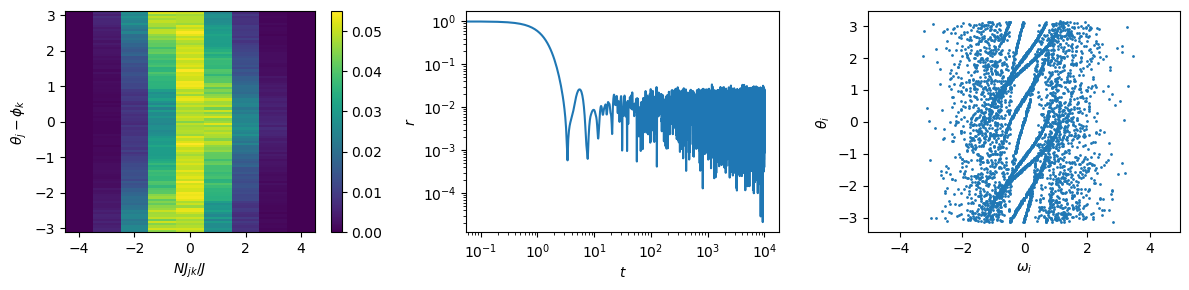

In [6]:
filebase='data/newtest1'
file=open(filebase+'.out')
lines=file.readlines()
N,K,t1,dt,c,seed=np.array(lines[0].split(),dtype=np.float64)
N=int(N)
K=int(K)
print(lines[1])
print(lines[-1])
file.close()

omega=np.fromfile(filebase+'frequencies.dat',dtype=np.float32)
N=len(omega)
thetas=np.unwrap(np.fromfile(filebase+'thetas.dat',dtype=np.float32).reshape((-1,N)),axis=0)
theta=np.fromfile(filebase+'fs.dat',dtype=np.float32)[:N]
r=np.fromfile(filebase+'order.dat',dtype=np.float32)
adj=np.fromfile(filebase+'adj.dat',dtype=np.float32).reshape((N,N))
coupling=np.fromfile(filebase+'fs.dat',dtype=np.float32)[N+2:]
B=np.mod(theta[:,np.newaxis]-np.arctan2(coupling[1::2],coupling[::2])[np.newaxis,:]+np.pi,2*np.pi)-np.pi


plt.subplots(1,3,figsize=(12,3))
plt.subplot(1,3,1)
plt.hist2d(N/2*adj.reshape(-1),B.reshape(-1),bins=(np.arange(10)-5+0.5,np.pi*(np.arange(100)-50+0.5)/50),density=True)
plt.xlabel(r'$NJ_{jk}/J$')
plt.ylabel(r'$\theta_j-\phi_k$')
plt.colorbar()

plt.subplot(1,3,2)
plt.plot(dt*np.arange(len(r)),r)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$t$')
plt.ylabel('$r$')

plt.subplot(1,3,3)
order=np.argsort(omega)
plt.scatter(omega,np.mod(theta+np.pi,2*np.pi)-np.pi,s=1)
plt.xlim(np.median(omega)-5,np.median(omega)+5)
plt.xlabel('$\omega_i$')
plt.ylabel(r'$\theta_i$')

plt.tight_layout()
plt.show()



./kuramoto -g 3 -N 5000 -K 6 -c 1.000000 -t 0.000000 -d 0.100000 -s 1 -nv data/newtest2 

runtime: 63.164706



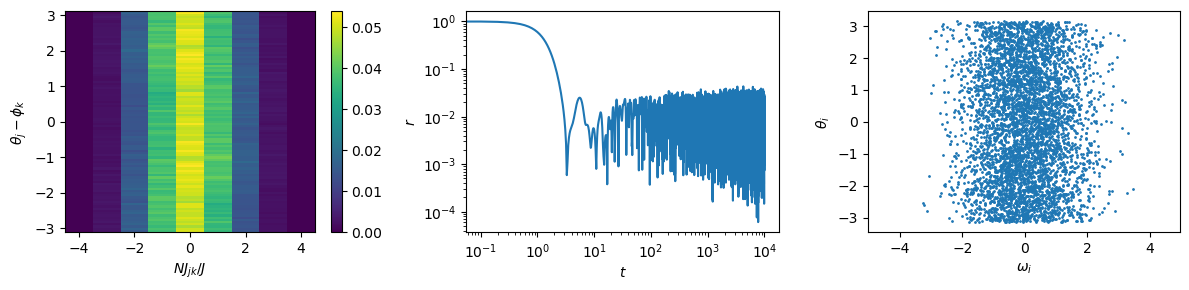

In [7]:
filebase='data/newtest2'
file=open(filebase+'.out')
lines=file.readlines()
N,K,t1,dt,c,seed=np.array(lines[0].split(),dtype=np.float64)
N=int(N)
K=int(K)
print(lines[1])
print(lines[-1])
file.close()

omega=np.fromfile(filebase+'frequencies.dat',dtype=np.float32)
N=len(omega)
thetas=np.unwrap(np.fromfile(filebase+'thetas.dat',dtype=np.float32).reshape((-1,N)),axis=0)
theta=np.fromfile(filebase+'fs.dat',dtype=np.float32)[:N]
r=np.fromfile(filebase+'order.dat',dtype=np.float32)
adj=np.fromfile(filebase+'adj.dat',dtype=np.float32).reshape((N,N))
coupling=np.fromfile(filebase+'fs.dat',dtype=np.float32)[N+2:]
B=np.mod(theta[:,np.newaxis]-np.arctan2(coupling[1::2],coupling[::2])[np.newaxis,:]+np.pi,2*np.pi)-np.pi


plt.subplots(1,3,figsize=(12,3))
plt.subplot(1,3,1)
plt.hist2d(N/2*adj.reshape(-1),B.reshape(-1),bins=(np.arange(10)-5+0.5,np.pi*(np.arange(100)-50+0.5)/50),density=True)
plt.xlabel(r'$NJ_{jk}/J$')
plt.ylabel(r'$\theta_j-\phi_k$')
plt.colorbar()

plt.subplot(1,3,2)
plt.plot(dt*np.arange(len(r)),r)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$t$')
plt.ylabel('$r$')

plt.subplot(1,3,3)
order=np.argsort(omega)
plt.scatter(omega,np.mod(theta+np.pi,2*np.pi)-np.pi,s=1)
plt.xlim(np.median(omega)-5,np.median(omega)+5)
plt.xlabel('$\omega_i$')
plt.ylabel(r'$\theta_i$')

plt.tight_layout()
plt.show()



./kuramoto -g 3 -N 5000 -K 5000 -c 1.000000 -t 0.000000 -d 0.100000 -s 1 -nv data/newtest3 

runtime: 335.887188



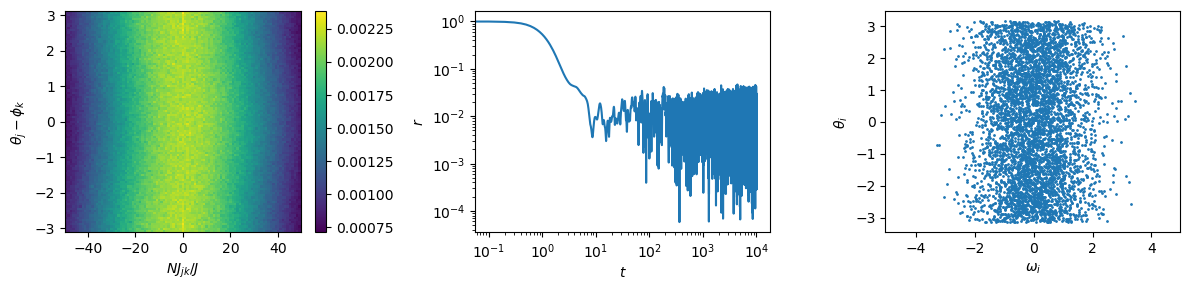

In [8]:
filebase='data/newtest3'
file=open(filebase+'.out')
lines=file.readlines()
N,K,t1,dt,c,seed=np.array(lines[0].split(),dtype=np.float64)
N=int(N)
K=int(K)
print(lines[1])
print(lines[-1])
file.close()

omega=np.fromfile(filebase+'frequencies.dat',dtype=np.float32)
N=len(omega)
thetas=np.unwrap(np.fromfile(filebase+'thetas.dat',dtype=np.float32).reshape((-1,N)),axis=0)
theta=np.fromfile(filebase+'fs.dat',dtype=np.float32)[:N]
r=np.fromfile(filebase+'order.dat',dtype=np.float32)
adj=np.fromfile(filebase+'adj.dat',dtype=np.float32).reshape((N,N))
coupling=np.fromfile(filebase+'fs.dat',dtype=np.float32)[N+2:]
B=np.mod(theta[:,np.newaxis]-np.arctan2(coupling[1::2],coupling[::2])[np.newaxis,:]+np.pi,2*np.pi)-np.pi


plt.subplots(1,3,figsize=(12,3))
plt.subplot(1,3,1)
plt.hist2d(N/2*adj.reshape(-1),B.reshape(-1),bins=(np.arange(100)-50+0.5,np.pi*(np.arange(100)-50+0.5)/50),density=True)
plt.xlabel(r'$NJ_{jk}/J$')
plt.ylabel(r'$\theta_j-\phi_k$')
plt.colorbar()

plt.subplot(1,3,2)
plt.plot(dt*np.arange(len(r)),r)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$t$')
plt.ylabel('$r$')

plt.subplot(1,3,3)
order=np.argsort(omega)
plt.scatter(omega,np.mod(theta+np.pi,2*np.pi)-np.pi,s=1)
plt.xlim(np.median(omega)-5,np.median(omega)+5)
plt.xlabel('$\omega_i$')
plt.ylabel(r'$\theta_i$')

plt.tight_layout()
plt.show()



./kuramoto -g 3 -N 5000 -K 5000 -c 3.000000 -t 0.000000 -d 0.100000 -s 1 -nv data/newtest4 

runtime: 271.423006



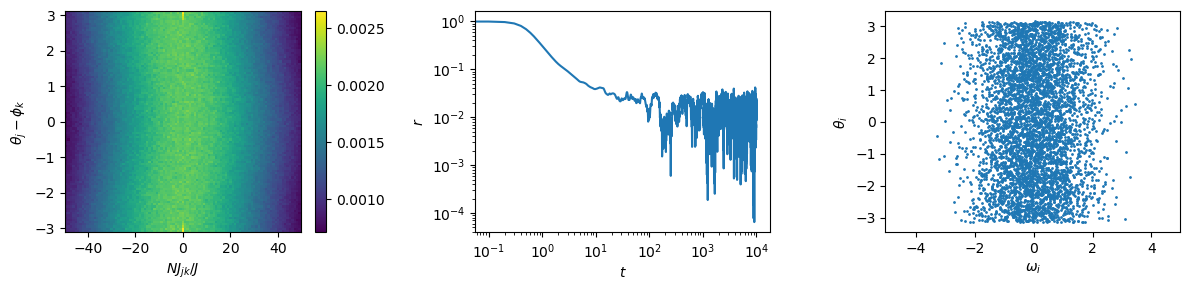

In [9]:
filebase='data/newtest4'
file=open(filebase+'.out')
lines=file.readlines()
N,K,t1,dt,c,seed=np.array(lines[0].split(),dtype=np.float64)
N=int(N)
K=int(K)
print(lines[1])
print(lines[-1])
file.close()

omega=np.fromfile(filebase+'frequencies.dat',dtype=np.float32)
N=len(omega)
thetas=np.unwrap(np.fromfile(filebase+'thetas.dat',dtype=np.float32).reshape((-1,N)),axis=0)
theta=np.fromfile(filebase+'fs.dat',dtype=np.float32)[:N]
r=np.fromfile(filebase+'order.dat',dtype=np.float32)
adj=np.fromfile(filebase+'adj.dat',dtype=np.float32).reshape((N,N))
coupling=np.fromfile(filebase+'fs.dat',dtype=np.float32)[N+2:]
B=np.mod(theta[:,np.newaxis]-np.arctan2(coupling[1::2],coupling[::2])[np.newaxis,:]+np.pi,2*np.pi)-np.pi


plt.subplots(1,3,figsize=(12,3))
plt.subplot(1,3,1)
plt.hist2d(N/2*adj.reshape(-1),B.reshape(-1),bins=(np.arange(100)-50+0.5,np.pi*(np.arange(100)-50+0.5)/50),density=True)
plt.xlabel(r'$NJ_{jk}/J$')
plt.ylabel(r'$\theta_j-\phi_k$')
plt.colorbar()

plt.subplot(1,3,2)
plt.plot(dt*np.arange(len(r)),r)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$t$')
plt.ylabel('$r$')

plt.subplot(1,3,3)
order=np.argsort(omega)
plt.scatter(omega,np.mod(theta+np.pi,2*np.pi)-np.pi,s=1)
plt.xlim(np.median(omega)-5,np.median(omega)+5)
plt.xlabel('$\omega_i$')
plt.ylabel(r'$\theta_i$')

plt.tight_layout()
plt.show()



### Scaling of the maximum frequency $\omega_M$

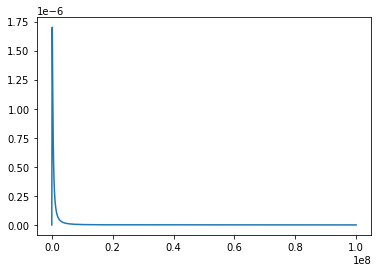

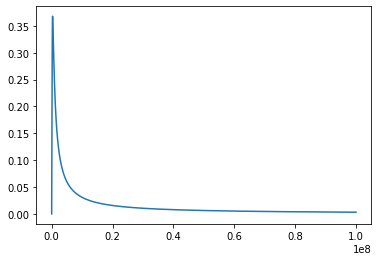

0.9968219776969255
1647530.735604397
1.6475307356043971


In [22]:
def func_cauchy(omega,N):
    return N/(np.pi*(1+omega**2))*(1/np.pi*np.arctan(omega)+0.5)**(N-1)
def func_cauchy2(omega,N):
    return N*omega/(np.pi*(1+omega**2))*(1/np.pi*np.arctan(omega)+0.5)**(N-1)
    
N=1000000
omegamax=100*N
omegamin=0
num=100000
omega=omegamax+(omegamin-omegamax)*np.arange(num)/num
a=func_cauchy(omega,N)
a2=func_cauchy2(omega,N)
plt.plot(omega,a)
plt.show()
plt.plot(omega,a2)
plt.show()
print(np.sum(a*(omegamax-omegamin)/num))
print(np.sum(a2*(omegamax-omegamin)/num))
print(np.sum(a2*(omegamax-omegamin)/num)/N)

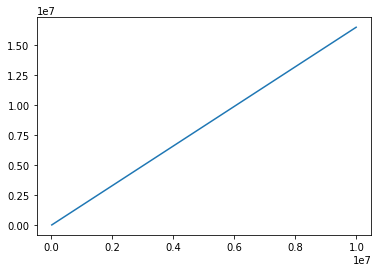

In [23]:
N=10000
Ns=[1000,10000,100000,1000000]
Ns=np.arange(10000,10000000,10000)
test=[]
for N in Ns:
    omegamax=100*N
    omegamin=0
    omega=omegamax+(omegamin-omegamax)*np.arange(num)/num
    a2=func_cauchy2(omega,N)
    test=test+[np.sum(a2*(omegamax-omegamin)/num)]
plt.plot(Ns,test)

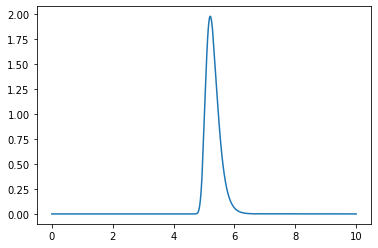

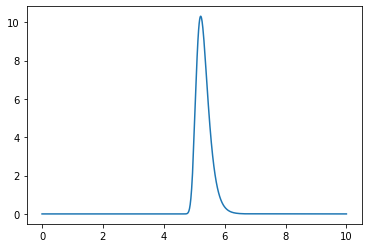

1.0000000000059996
5.3009540102042685
1.3203746328990724


In [24]:
def func_normal(omega,N):
    return N*np.exp(-omega**2/2)/(2*np.pi)**0.5*(0.5+0.5*erf(omega/2**0.5))**(N-1)
def func_normal2(omega,N):
    return N*omega*np.exp(-omega**2/2)/(2*np.pi)**0.5*(0.5+0.5*erf(omega/2**0.5))**(N-1)

N=10000000
omegamax=10
omegamin=0
num=100000
omega=omegamax+(omegamin-omegamax)*np.arange(num)/num
a=func_normal(omega,N)
a2=func_normal2(omega,N)
plt.plot(omega,a)
plt.show()
plt.plot(omega,a2)
plt.show()
print(np.sum(a*(omegamax-omegamin)/num))
print(np.sum(a2*(omegamax-omegamin)/num))
print(np.sum(a2*(omegamax-omegamin)/num)/(np.log(N)**0.5))

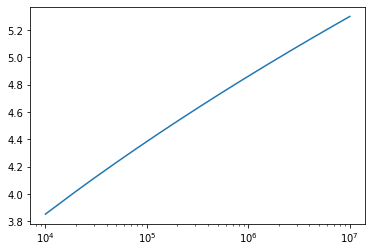

In [25]:
Ns=[1000,10000,100000,1000000]
Ns=np.arange(10000,10000000,10000)
test=[]
for N in Ns:
    a2=func_normal2(omega,N)
    test=test+[np.sum(a2*(omegamax-omegamin)/num)]
plt.plot(Ns,test)
plt.xscale('log')

### Averaging results from cluster simulations

In [ ]:
# Make avgorder from cluster output

seeds=750
Ns=5000*np.arange(1,2)
for N in Ns:
    Ks=[0,2,N]
    for K in Ks:
        rs=[]
        omegas=[]
        thetas=[]
        for seed in range(1,seeds+1):
            filebase='data/%i/%i/%i'%(N,K,seed)
            if os.path.exists(filebase+'order.dat'):
                r=np.fromfile(filebase+'order.dat',dtype=np.float32)
                if r.shape[0]==10001:
                    rs=rs+[r]
                else:
                    print(seed,filebase,len(r))
        if len(rs)>0:
            print('%i\t%i\t%i\t\n'%(N,K,len(rs)),end='')
            try:
                r1=np.mean(rs,axis=0)
                np.save('data/%i/%i/avgorder.npy'%(N,K),r1)
            except Exception as e:
                print(np.where([r.shape[0]!=10001 for r in rs])[0])

In [ ]:
# Make avgorder from cluster output

seeds=750
Ns=5000*np.arange(1,2)
for N in Ns:
    Ks=[0,2,N]
    for K in Ks:
        rs=[]
        omegas=[]
        thetas=[]
        for seed in range(1,seeds+1):
            filebase='data/%i_lorentz/%i/%i'%(N,K,seed)
            if os.path.exists(filebase+'order.dat'):
                r=np.fromfile(filebase+'order.dat',dtype=np.float32)
                if r.shape[0]==10001:
                    rs=rs+[r]
                else:
                    print(seed,filebase,len(r))
        if len(rs)>0:
            print('%i_lorentz\t%i\t%i\t\n'%(N,K,len(rs)),end='')
            try:
                r1=np.mean(rs,axis=0)
                np.save('data/%i_lorentz/%i/avgorder.npy'%(N,K),r1)
            except Exception as e:
                print(np.where([r.shape[0]!=10001 for r in rs])[0])

In [ ]:
# Make avgorder from cluster output

seeds=500
Ns=10000*np.arange(1,10)
for N in Ns:
    Ks=[0,2*N//10,4*N//10,6*N//10,8*N//10,N]
    for K in Ks:
        rs=[]
        omegas=[]
        thetas=[]
        for seed in range(1,seeds+1):
            filebase='data/%i/%i/%i'%(N,K,seed)
            if os.path.exists(filebase+'order.dat'):
                r=np.fromfile(filebase+'order.dat',dtype=np.float32)
                if r.shape[0]==10001:
                    rs=rs+[r]
                else:
                    print(seed,filebase,len(r))
        if len(rs)>0:
            print('%i\t%i\t%i\t\n'%(N,K,len(rs)),end='')
            try:
                r1=np.mean(rs,axis=0)
                np.save('data/%i/%i/avgorder.npy'%(N,K),r1)
            except Exception as e:
                print(np.where([r.shape[0]!=10001 for r in rs])[0])

In [ ]:
# Make avgorder from cluster output

seeds=500
Ns=100000*np.arange(1,3)
for N in Ns:
    Ks=[0,2*N//10,4*N//10,6*N//10,8*N//10,N]
    for K in Ks:
        rs=[]
        omegas=[]
        thetas=[]
        for seed in range(1,seeds+1):
            filebase='data/%i/%i/%i'%(N,K,seed)
            if os.path.exists(filebase+'order.dat'):
                r=np.fromfile(filebase+'order.dat',dtype=np.float32)
                if r.shape[0]==10001:
                    rs=rs+[r]
                else:
                    print(seed,filebase,len(r))
        if len(rs)>0:
            print('%i\t%i\t%i\t\n'%(N,K,len(rs)),end='')
            try:
                r1=np.mean(rs,axis=0)
                np.save('data/%i/%i/avgorder.npy'%(N,K),r1)
            except Exception as e:
                print(np.where([r.shape[0]!=10001 for r in rs])[0])